# Heat Engine
Thermodynamics is a branch of science which deals with the study of heat transfer.

In thermodynamics, a heat engine is a system that converts heat into mechanical energy, which can then be used to do mechanical work.

Beforing jumping into the model of our heat engine, let us first have an overview of different types of processes happening in it one-by-one.

In [1]:
from thermodynamics_logic import *

## Isothermal Reversible Process
In an Isothermal Process, the temperature remains constant overtime!

As temperature is constant,
- &#916;U = nC<sub>v</sub>&#916;T = 0
- Work done is Area under P-V Curve
- From 1st law of thermodynamic, q = -w
- PV = nRT = `constant`

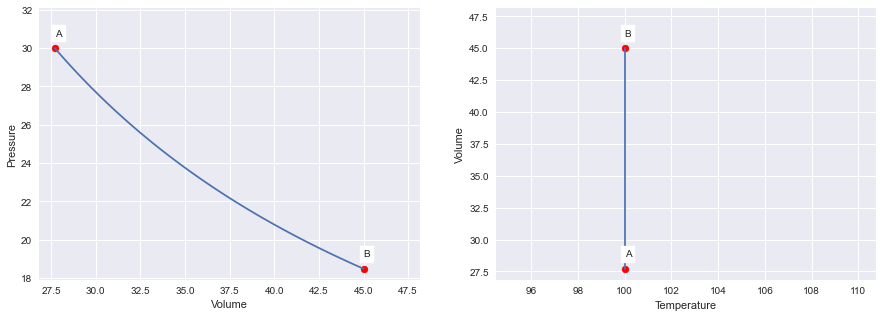

({'pressure': 30, 'volume': 27.71333333333333, 'temperature': 100},
 {'pressure': 18.475555555555555, 'volume': 45, 'temperature': 100},
 {'u': 0.0, 'w': -403.0201894120282, 'q': 403.0201894120282})

In [2]:
a = StateVariable(pressure=30,temperature=100)
b = StateVariable(volume=45)
x = TherodynamicProcess.IsothermalReversible(a,b)

pvt = x.coordinates()
TherodynamicProcess.plot(pvt)
a.__dict__,b.__dict__,x.stats()

## Adiabatic Process
In an Adaibatic Process, there is no heat transfer with the system and surrounding!

As a result,
- q = 0
- w = Area under P-V Curve
- &#916;U = q + w = w
- PV<sup>&#120574;</sup> = `constant`

where &#120574; is the specific heat ratio of a gas

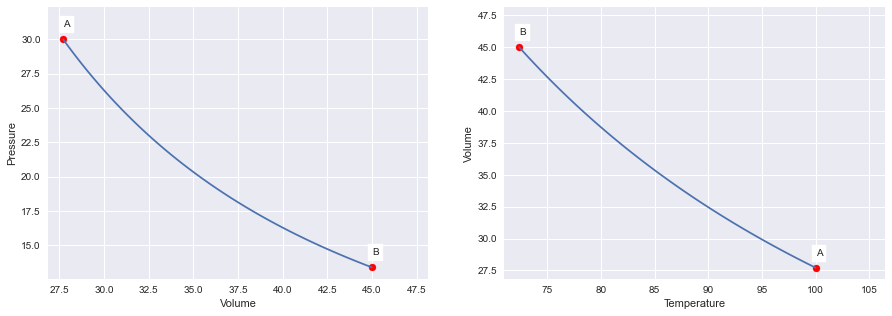

({'pressure': 30, 'volume': 27.71333333333333, 'temperature': 100},
 {'pressure': 13.373600350824853,
  'volume': 45,
  'temperature': 72.38537596669694},
 {'u': -344.3819763193224, 'w': -344.3819763193224, 'q': 0.0})

In [3]:
a = StateVariable(pressure=30,temperature=100)
b = StateVariable(volume=45)
x = TherodynamicProcess.AdiabaticReversible(a,b)

pvt = x.coordinates()
TherodynamicProcess.plot(pvt)
a.__dict__,b.__dict__,x.stats()

## Polyisotropic Process
A polyisotropic process is the one which follows a general rule :

PV<sup>x</sup> = constant

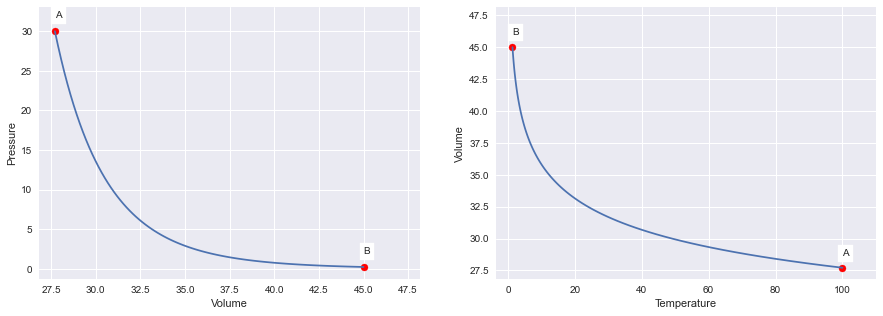

({'pressure': 30, 'volume': 27.71333333333333, 'temperature': 100},
 {'pressure': 0.2354419095626269,
  'volume': 45,
  'temperature': 1.274342786903802},
 {'u': -1231.2076711045224, 'w': -91.20056822996465, 'q': -1140.0071028745579})

In [4]:
a = StateVariable(pressure=30,temperature=100)
b = StateVariable(volume=45)
x = TherodynamicProcess.PolyIsotropicProcess(a,b,10) # PV^10 = k

pvt = x.coordinates()
TherodynamicProcess.plot(pvt)
a.__dict__,b.__dict__,x.stats()

# Isobaric Process
In Isobaric Process, the pressure remains constant over time.

- p = `constant`
- w = - p (&#916;V) = -p(V<sub>2</sub>-V<sub>1</sub>)

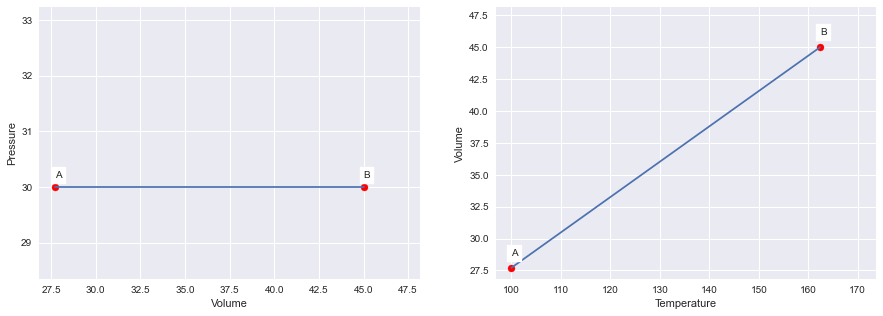

({'pressure': 30.0, 'volume': 27.71333333333333, 'temperature': 100},
 {'pressure': 30.0, 'volume': 45, 'temperature': 162.3767139764253},
 {'u': 777.8999999999997, 'w': -518.6000000000001, 'q': 1296.5})

In [5]:
a = StateVariable(pressure=30,temperature=100)
b = StateVariable(volume=45)
x = TherodynamicProcess.IsobaricProcess(a,b)

pvt = x.coordinates()
TherodynamicProcess.plot(pvt)
a.__dict__,b.__dict__,x.stats()

## Carnot's Engine
Carnot engine is a theoretical thermodynamic cycle proposed by Leonard Carnot. It estimates the maximum possible efficiency that a heat engine during the conversion process of heat into work and, conversely, working between two reservoirs can possess.

A Carnot cycle is defined as an ideal reversible closed thermodynamic cycle. Four successive operations are involved: isothermal expansion, adiabatic expansion, isothermal compression, and adiabatic compression. During these operations, the expansion and compression of the substance can be done up to the desired point and back to the initial state.

![Carnot's Engine Working](carnot_working.png)

(Image source : Google)

Let's visualise a carnot's engine by only a small amount of information about all the states and process it upto maximum of our knowledge!

Processes : A $\xrightarrow{\text{Isothermal}}$ B  $\xrightarrow{\text{Adiabatic}}$ C $\xrightarrow{\text{Isothermal}}$ D $\xrightarrow{\text{Adiabatic}}$ A

In [6]:
# State A
pressureA = None
volumeA = 2
temeratureA =  None
a = StateVariable(pressureA,volumeA,temeratureA)

# State B
pressureB = None
volumeB = 5
temeratureB = None
b = StateVariable(pressureB,volumeB,temeratureB)

# State C
pressureC =  None
volumeC = 6
temeratureC = 10
c = StateVariable(pressureC,volumeC,temeratureC)

# State D
pressureD = None
volumeD = None
temeratureD = None
d = StateVariable(pressureD,volumeD,temeratureD)

a.__dict__,b.__dict__,c.__dict__,d.__dict__

({'pressure': None, 'volume': 2, 'temperature': None},
 {'pressure': None, 'volume': 5, 'temperature': None},
 {'pressure': 13.856666666666667, 'volume': 6, 'temperature': 10},
 {'pressure': None, 'volume': None, 'temperature': None})

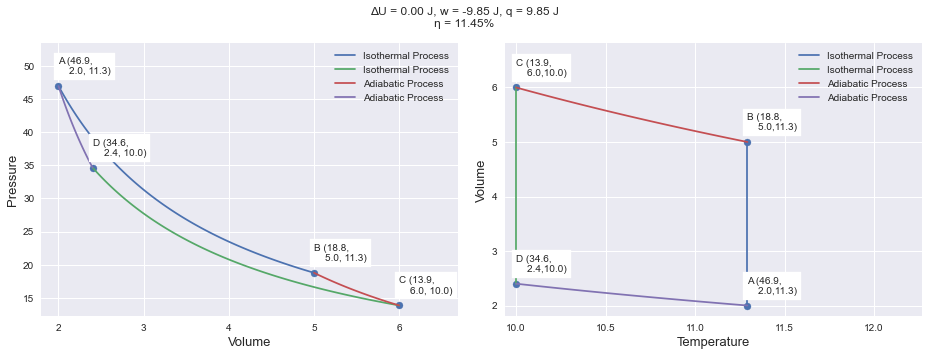

{'u': 0.0,
 'w': -9.845802793060827,
 'q': 9.845802793060827,
 'e': 0.11445119234782504}

In [7]:
TherodynamicProcess.carnotEnginePlot(a,b,c,d)

### Efficiency of Carnot's Engine
- Therory : Efficiency of a carnot's engine only depends on the ratio of the working temperatures
- Let us check out the accuracy of this statement.
- Through the analysis we will also try to figure out what is the ideal value of temperature ratio good for practice.
- We will also visualize the problem of even today's heat engine.

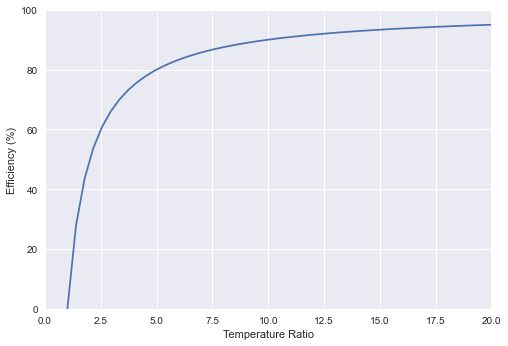

In [8]:
temp_ratio = np.linspace(1,20,50)
room_temp = 273+25
volB = 5
e = []
for i in temp_ratio:
    a = StateVariable(volume=10,temperature=room_temp)
    c = StateVariable(temperature=i*room_temp)
    b = StateVariable(volume=volumeB)
    d = StateVariable()
    e.append(TherodynamicProcess.carnotEnginePlot(a,b,c,d,plot=False)['e']*100)
plt.subplots()
plt.ylim(0,100)
plt.xlim(left=0,right=20)
plt.xlabel('Temperature Ratio')
plt.ylabel('Efficiency (%)')
plt.plot(temp_ratio,e);

- After explaing the above curve to a few people, I conducted a small survey asking what part do they find most efficient keeping in mind about the efficiency and feasiability of the temperature ratio in practical purposes, most of the answer were in the region where temp_ratio vaired between `2.5` to `5.0`
- Let's look into such a model where temp ratio is `3.75`

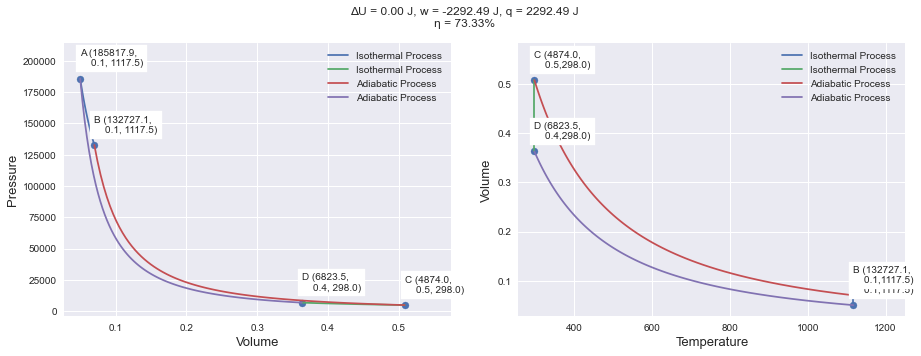

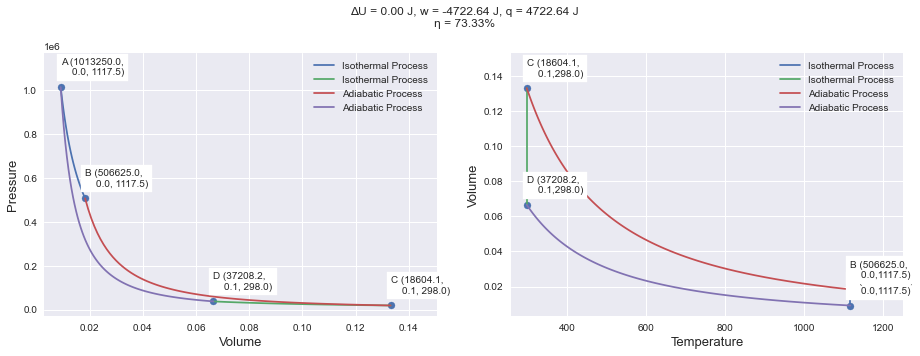

[844.5, 25]


In [9]:
atm = 101325
a = StateVariable(volume=0.05,temperature=3.75*room_temp) # 0.05 cubic meter => 50 L
c = StateVariable(temperature=room_temp)
b = StateVariable(volume=0.07)
d = StateVariable()
TherodynamicProcess.carnotEnginePlot(a,b,c,d,plot=True)

a = StateVariable(pressure=10*atm,temperature=3.75*room_temp)
b = StateVariable(pressure=5*atm)
c = StateVariable(temperature=room_temp)
d = StateVariable()
TherodynamicProcess.carnotEnginePlot(a,b,c,d,plot=True)

print([a.temperature-273, c.temperature-273])

- Observations :
1. We get an excellent efficiency of **73.33%** with source temperature to be **844&#176;C** and sink temperature to be **25&#176;C**, which is quite fesiable for industries.
1. But wait, did we look into the other parameter?
1. The volume of two of the states was restricted by the program to a feasiable value, but the pressure! Obviously due to laws of physics we can't bind all the terms to certain value, hence the pressure attains a super-high value which won't be possible to handle!
1. This is the reason why **we have to compromise and deal with huge energy loss** as we have to take care of all the factors related to the engine instead of just the efficiency and temperature which is often ignored due to lack of visualization an people misinterpret the efficiency of the engine used even now a days!
1. Upon crawling over the internet, I came to find out engine's used today usually have an efficiency between *3% to 55%*. Yes you read it right, starting from **as small as 3%!**
1. On trying to bind the pressure, the volume get's out of our hand!

### What we can do?
- We have to build a better model and a more efficient system which can gain maximum efficiency at minimum cost and efforts.
- Since hit and trial is not an feasiable option, we can test out every possibility through a virtual mode on our system.
- With this program I designed, we can break the limitation and test out these possibility which may help us attain a better future.
- Let's try to make an engine with a given set of rule to see how to implement it through the virtual mode.

#### Example : Processes & their rules
1. First Process : P + V = 10
1. Second Process : PV<sup>5</sup> = 55
1. Third Process : Isothermal Process
1. Fourth Process : Adiabatic Process
1. Let the system expand from 4m<sup>3</sup> to 7m<sup>3</sup> under first process and then compress as per the second polyisotropic process to a value of 6m<sup>3</sup> and then let it again compress as Isothermal process and finally let it expand as Adiabatic Process.

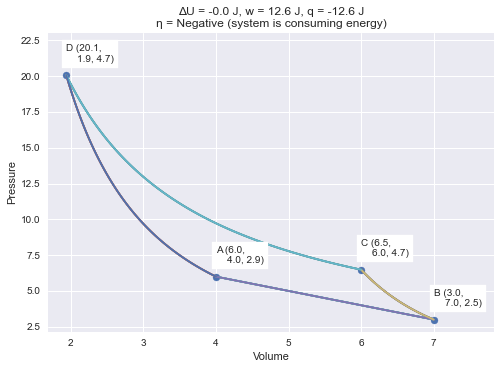

{'u': -3.552713678800501e-15,
 'w': 12.584193873504116,
 'q': -12.584193873504113,
 'e': -0.4010084831064804}

In [10]:
a = StateVariable(volume=4)
b = StateVariable(volume=7)
c = StateVariable(volume=6)
d = StateVariable()

def firstProcess():
    process = TherodynamicProcess.DefineRulePV(lambda x: 10-x)
    return process
def secondProcess():
    process = TherodynamicProcess.PolyIsotropicProcess(b,c,5,k=55)
    return process
def thirdProcess():
    process = TherodynamicProcess.IsothermalReversible(c,d)
    return process
def fourthProcess():
    process = TherodynamicProcess.AdiabaticReversible(d,a)
    return process
    
states = [a,b,c,d]
processes = [firstProcess,secondProcess,thirdProcess,fourthProcess]
TherodynamicProcess.plotCustomEngine(states,processes)

- After experimentation with the same processes and different values, we can eventually figure out a way to make the engine efficient without having to use our resources yet with everything at our fingertips!

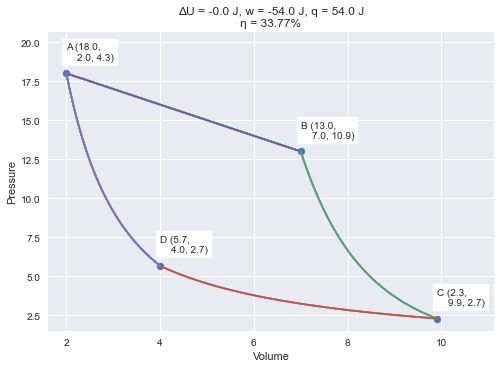

{'u': -7.105427357601002e-15,
 'w': -54.02930909338081,
 'q': 54.029309093380796,
 'e': 0.33768318183363005}

In [11]:
a = StateVariable(volume=2)
b = StateVariable(volume=7)
c = StateVariable()
d = StateVariable(volume=4)

def firstProcess():
    process = TherodynamicProcess.DefineRulePV(lambda x: 20-x)
    return process
def secondProcess():
    process = TherodynamicProcess.PolyIsotropicProcess(b,c,5,k=55)
    return process
def thirdProcess():
    process = TherodynamicProcess.IsothermalReversible(c,d)
    return process
def fourthProcess():
    process = TherodynamicProcess.AdiabaticReversible(d,a)
    return process

states = [a,b,c,d]
processes = [firstProcess,secondProcess,thirdProcess,fourthProcess]
TherodynamicProcess.plotCustomEngine(states,processes)

## What next?
- Hereby you have a tool to apply your knowledge of PV relations!
- Think of efficient processes and visualise it's fesiability using this program and help out to come up with a better engine for the society.
- The program can further by used to study and teach heat engine and carnot's engine in details.
- The program can also be used to visualize a segment of heat engine process i.e.- it may be used to study processes seperately instead of as a collection in Heat Engine as we did above!